In [9]:
#Various Python modules for basic needs.
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

#Core Libra routines for model potentials, data types, etc.
from liblibra_core import *
import libra_py.models.Holstein as Holstein
import util.libutil as comn
import libra_py.data_savers as data_savers

#QTAG modules implemented in Libra.
import libra_py.dynamics.qtag.compute as compute
import libra_py.dynamics.qtag.initialize as initialize
import libra_py.dynamics.qtag.plot as plot
import libra_py.dynamics.qtag.save as save

In [10]:
class tmp:
    pass

In [11]:
def compute_model(q, model_params, full_id):

    model = model_params["model"]
    res = None
    
    if model==0:
        res = Holstein.Holstein5(q, model_params, full_id)
    else:
        print("Unrecognized model! Check for correct model import statement.")

    return res

In [12]:
#Potential parameters for Holstein5
model_params = {
    "model":0,
    "deriv_lvl":2,
    "E_n":[0.0,15.8114],
    "x_n":[0.0,1.0],
    "k_n":[10.0,10.0],
    "V":[[0.0,1.0],[1.0,0.0]],
    "alpha":[[0.0,1.5811],[1.5811,0.0]],
    "x_nm":[[0.0,2.0],[2.0,0.0]],
    "ex_cpl_A":1.0,
    "ex_cpl_B":1.5811,
    "ex_cpl_C":2.0
}

In [13]:
#Parameters for general simulation
dyn_params = {
    "init_placement":0,
    "wfc_q0":[-2.0], "wfc_p0":[0.0], "wfc_a0":[1.0], "wfc_s0":[0.0],
    "states":[0, 1],
    "grid_dims":[25], "alp_scl":[6.0], "rho_cut":1e-12
}


ntraj, Q, P, A, S, active_states = initialize.initialize(dyn_params)

In [14]:
Q0 = MATRIX(1,1); Q0.set(0,0, dyn_params["wfc_q0"][0])
P0 = MATRIX(1,1); P0.set(0,0, dyn_params["wfc_p0"][0])
A0 = MATRIX(1,1); A0.set(0,0, dyn_params["wfc_a0"][0])
S0 = MATRIX(1,1); S0.set(0,0, dyn_params["wfc_s0"][0])
istate = [0]

C = initialize.coeffs(Q0, P0, A0, S0, istate, Q, P, A, S, active_states)

In [15]:
# 1D mass
iM = MATRIX(1, 1);  iM.set(0,0,1.0);

#Parameters for general simulation
dyn_params = {
    "target_states":[0,1], "states":[0,1],
    "dt":0.01, "nsteps":800, "iM":iM,
    "hdf5_output_level":0, "txt2_output_level":3, 
    "properties_to_save":["time","Etot","pops","q","p","a","coeffs"],
    "q_update_method":1, "p_update_method":1, "a_update_method":1, "s_update_method":0,  
    "q_sync_method":1, "p_sync_method":0, "a_sync_method":0, "s_sync_method":0,
    "mom_calc_type":1, "linfit_beta":1e-3, "decpl_den":0.1, "d_weight":1.0,
    "qtag_pot_approx_method":3,
    "prefix":"holstein"
}


compute.run_qtag(Q, P, A, S, active_states, C, iM, dyn_params, compute_model, model_params)

21.055555554604624 [0.9999999999573959, 4.766053165945408e-14]
21.054279841752027 [0.9999999999902088, 4.2269804831212674e-13]
21.049120216372874 [1.0000000000845422, 1.1395403849648554e-12]
21.044359889475707 [1.0000000002076412, 2.133511178629732e-12]
21.040016158320295 [1.0000000001487217, 3.3138315031049863e-12]
21.036105125139322 [1.0000000002474656, 4.571371485443275e-12]
21.032642600941408 [1.0000000003431153, 5.788146156161404e-12]
21.029643635229544 [1.0000000002656768, 6.84784981557239e-12]
21.027122988968525 [1.0000000002123424, 7.646640290065257e-12]
21.02509556014995 [1.0000000002332008, 8.10335930492836e-12]
21.023575735022025 [1.0000000002065896, 8.168401138326858e-12]
21.022576656655826 [1.0000000001776885, 7.830542934753223e-12]
21.022110190778065 [1.0000000000805844, 7.121184703775512e-12]
21.022188188270928 [0.9999999999861816, 6.115640353520787e-12]
21.022819170134845 [0.9999999999342241, 4.931331277436135e-12]
21.02400969547616 [0.9999999999298473, 3.72298520097004

(<liblibra_core.MATRIX at 0x2b5631f28f30>,
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 <liblibra_core.CMATRIX at 0x2b5631f153b0>)

Number of files = 5


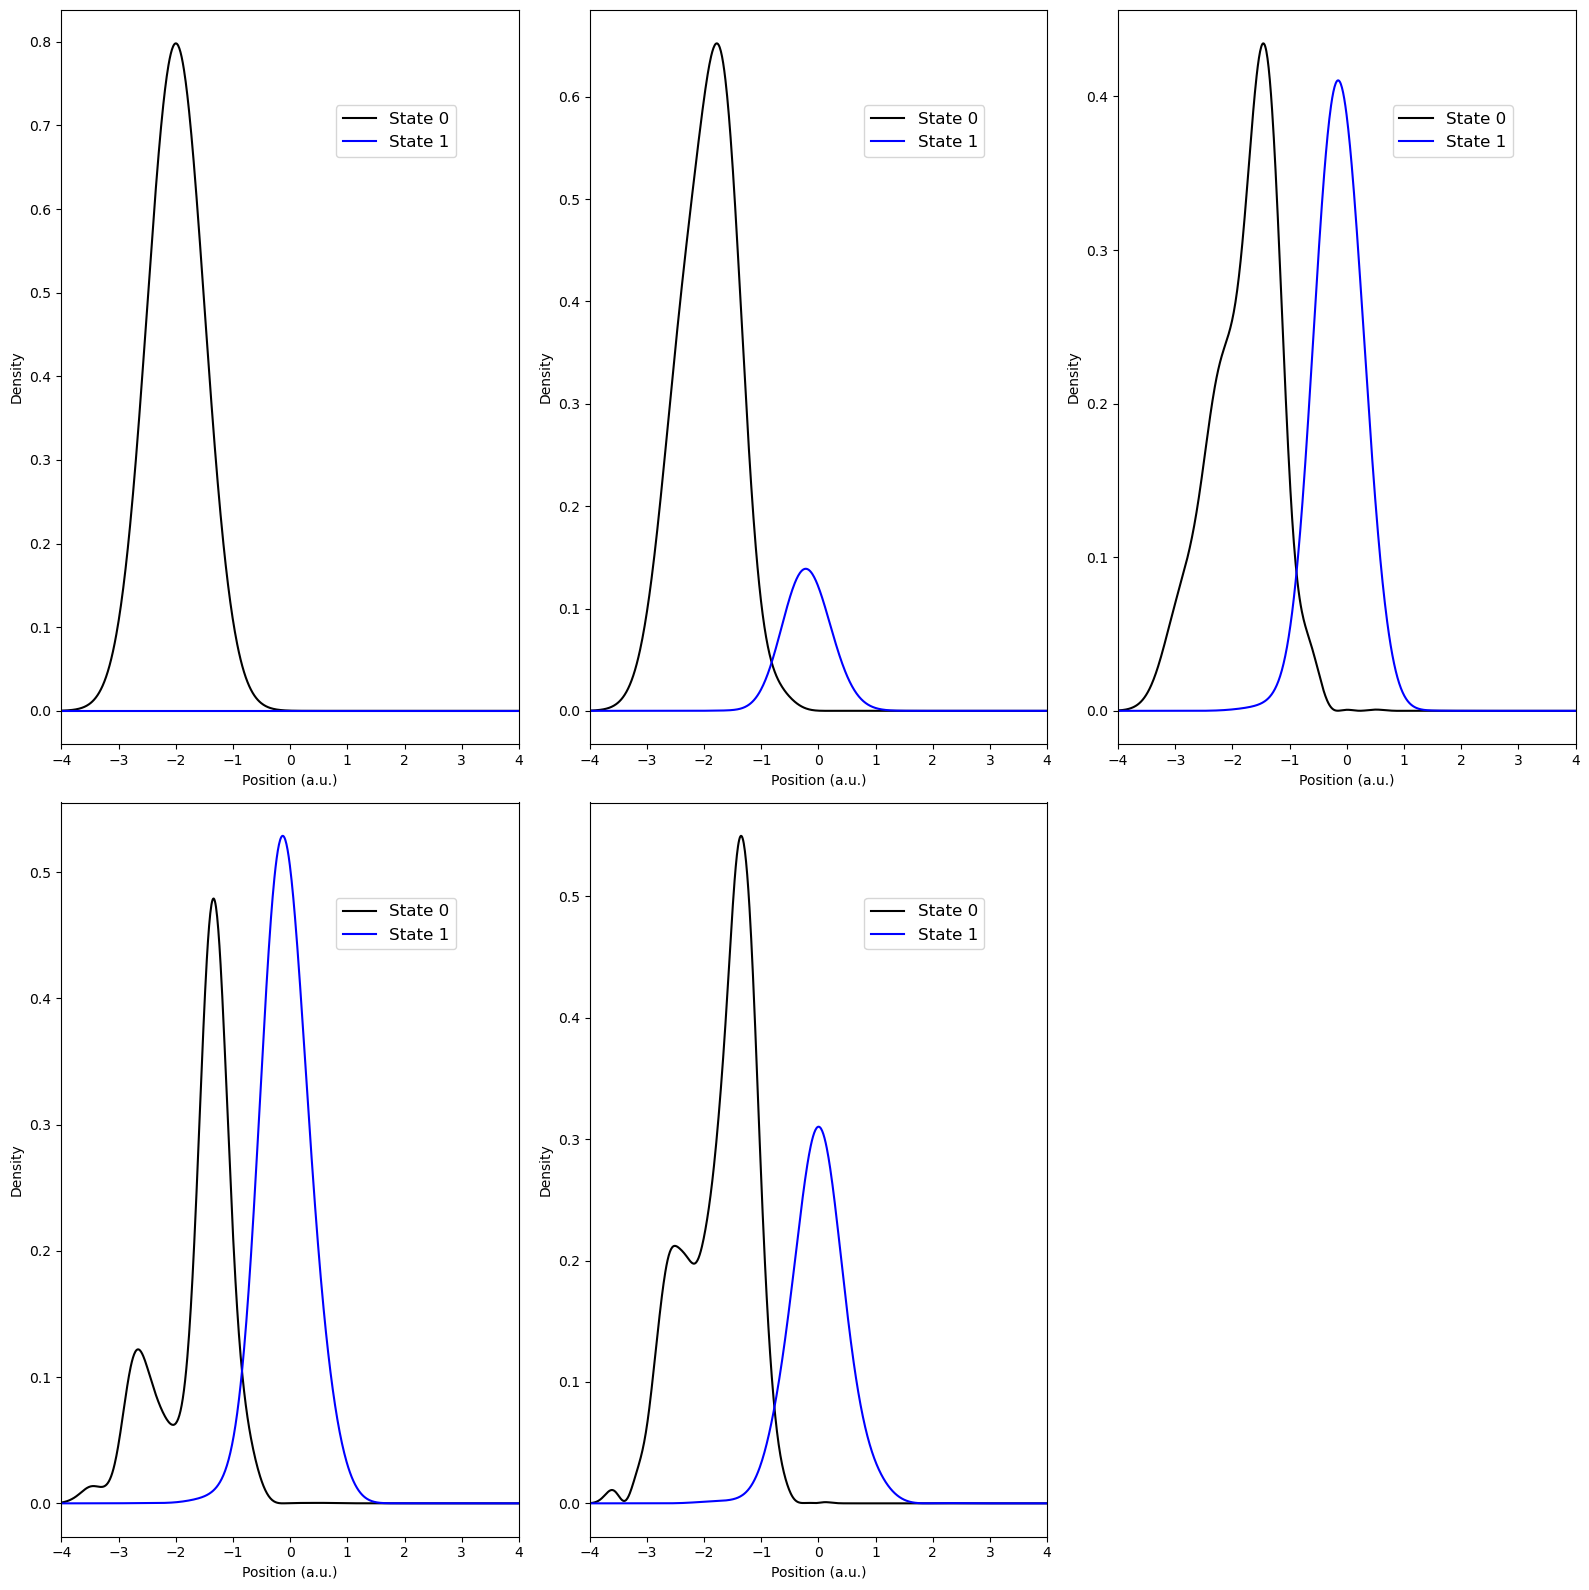

In [16]:
#Plot parameters dictionary definitions for wavefunction output...
plt_params = {'prefix':dyn_params['prefix'], 'which_states':[0,1], 
              'size':(16,16), 'xmin':[-4.0],'xmax':[4.0],
              'npoints':[800], 'snaps':[0,199,399,599,799],
              'xlabel':'Position (a.u.)', 'ylabel':'Density', 'zlabel':'N/A',
              '1Dcolors':['Black','Blue'], '2Dcolors':['Reds','Blues'],
              'legend_loc':(0.6,0.8), 'legend_size':12,
              "grid_dims":[25]
             }

dyn_params.update( { "grid_dims":[25], "ndof":1 } )

#Call wf_calc_nD to calculate gridded wavefunction data from coefficients and qpas output...
compute.wf_calc_nD(dyn_params, plt_params, plt_params['prefix'])

#Plot the selected snapshots...
plot.wf_plot(dyn_params, plt_params)

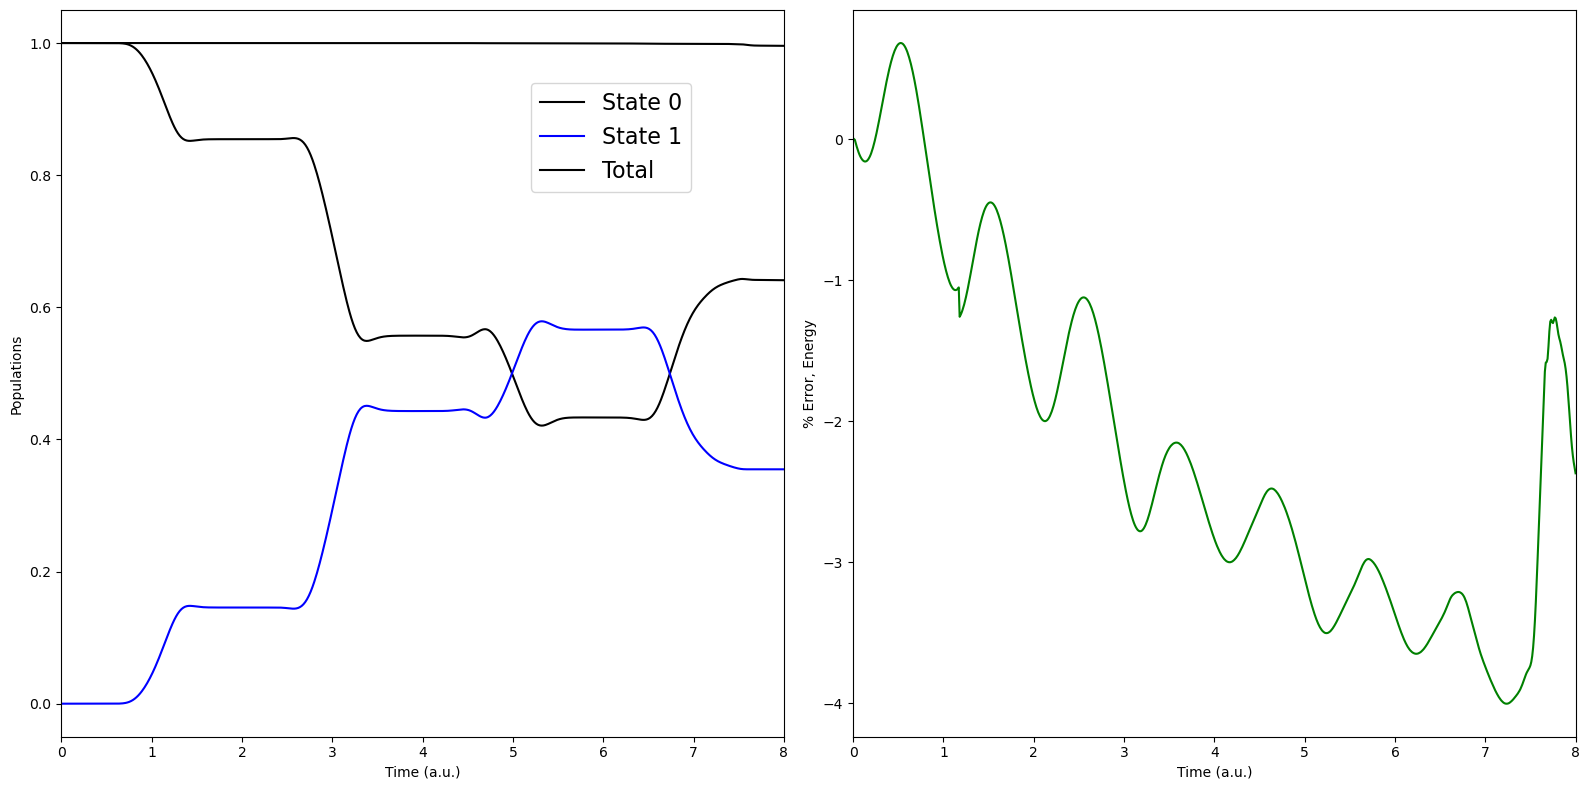

In [17]:
#Plot parameters dictionary definitions for energy/population output...
plt_params = {'prefix':dyn_params['prefix'], 'size':(16,8), 'xmin':[0], 'xmax':[8.0], 
              '1Dcolors':['Black','Blue'], 'legend_loc':(0.65,0.75), 'legend_size':16}

#Plot the graphs...
plot.energy_and_pops(dyn_params, plt_params)

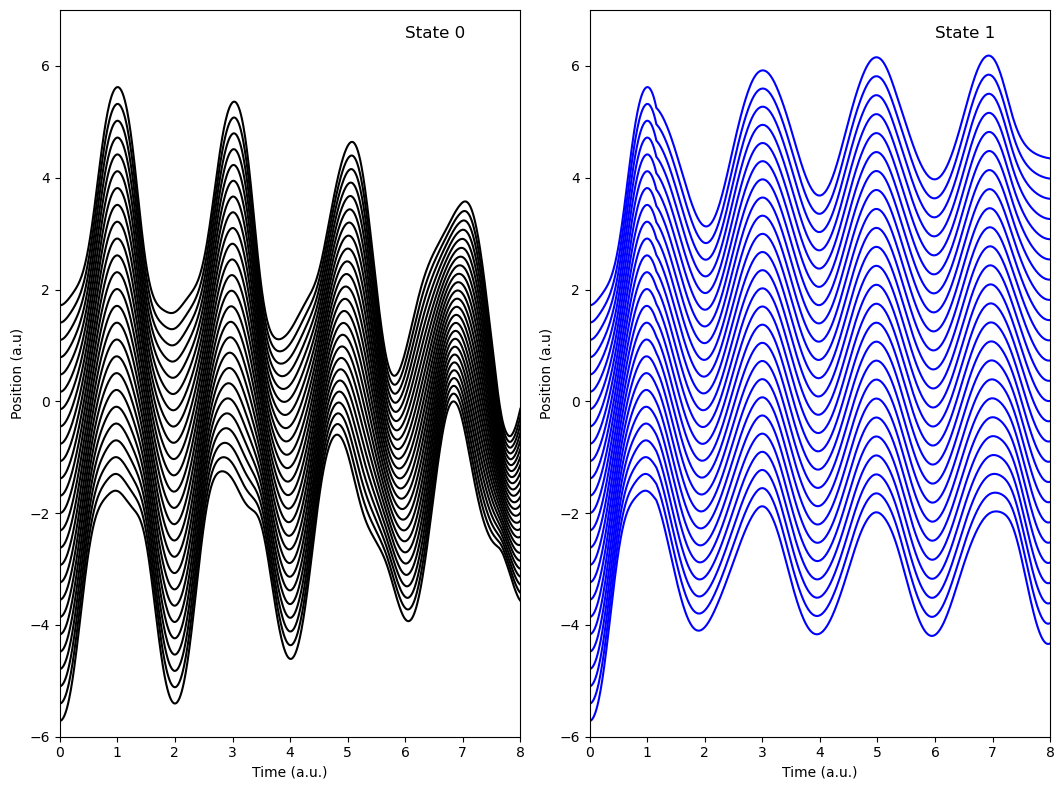

In [18]:
#Plot parameters dictionary definitions for trajectory output...
plt_params = {'prefix':dyn_params['prefix'], 'which_states':[0, 1], 'which_traj':'all', 
              'size':(16,8), 'xmin':[0,-6.0],'xmax':[8.0,7.0],
              'xlabel':'Time (a.u.)', 'ylabel':'Position (a.u)', 'zlabel':'N/A',
              '1Dcolors':['Black','Blue']}

#Plot the output...
plot.trajectories(dyn_params, plt_params)